In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras as kr
print(kr.__version__)

2.15.0
2.15.0


In [ ]:
import pandas as pd
import json
import os
import zipfile
import tensorflow as tf
import numpy as np

In [ ]:


local_zip = "/content/label_studio_coco_2.zip"

zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [ ]:


json_path = '/content/dataset/result.json'
data_file = open(json_path)
data = json.load(data_file)

In [ ]:
data['images'][32]

{'width': 453,
 'height': 323,
 'id': 32,
 'file_name': 'images/93bb579a-89c26158c4.jpg'}

In [ ]:
data['annotations'][32]

{'id': 32,
 'image_id': 21,
 'category_id': 1,
 'segmentation': [],
 'bbox': [170.23724137931032,
  260.41241379310344,
  251.1420689655173,
  310.1351724137931],
 'ignore': 0,
 'iscrowd': 0,
 'area': 77887.98885897742}

In [ ]:
data['categories'][0]

{'id': 0, 'name': 'carros'}

In [ ]:
import pandas as pd
import json

def convert_coco_json_to_csv(coco_path, result_folder):
  data_file = open(json_path)
  data = json.load(data_file)
  csv_list = []

  for annotation in data['annotations']:
    image = data['images'][annotation['image_id']]
    category = data['categories'][annotation['category_id']]

    image_width = image['width']
    image_height = image['height']
    file_name = image['file_name']
    classification_name = category['name']
    bbox = annotation['bbox']  # [xmin, ymin, width, height]

    # Convert COCO bbox format to [xmin, ymin, xmax, ymax]
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height

    value = (
        file_name,
        image_width,
        image_height,
        classification_name,
        xmin,
        ymin,
        xmax,
        ymax,
    )
    csv_list.append(value)
  # Al final lo almacenamos en un CSV con el nombre de las columnas siguiente
  column_name = [
    'filename',
    'width',
    'height',
    'class',
    'xmin',
    'ymin',
    'xmax',
    'ymax',
  ]
  csv_df = pd.DataFrame(csv_list, columns = column_name)

  # Convert the DataFrame to a CSV file
  csv_df.to_csv(f'{result_folder}coco.csv', index=False)

convert_coco_json_to_csv('dataset/result.json', './')

In [ ]:
# Read a CSV file with pandas
ml_df = pd.read_csv('coco.csv')

# Print the DataFrame
ml_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,images/bbe130e8-2b37a718bc.jpg,1024,768,carros,442.791724,351.691034,950.201379,650.416552
1,images/8b7dc31c-2efb6c3c82.jpg,1920,1080,carros,789.729730,572.432432,851.351351,632.432432
2,images/8b7dc31c-2efb6c3c82.jpg,1920,1080,carros,1151.351351,565.945946,1295.675676,666.486486
3,images/8b7dc31c-2efb6c3c82.jpg,1920,1080,carros,951.891892,587.027027,1008.648649,625.945946
4,images/7063abb3-6f65ac7a0a.jpg,681,1023,motos,114.293793,344.292414,417.666207,798.645517
...,...,...,...,...,...,...,...,...
160,images/7f941d7d-e4927496c4.jpg,600,418,motos,257.718621,251.953103,289.428966,293.464828
161,images/7f941d7d-e4927496c4.jpg,600,418,motos,275.591724,243.304828,310.184828,278.474483
162,images/40d458e0-e9379064f8.jpg,1068,498,carros,553.032609,0.000000,1068.000000,484.467391
163,images/2fe40f02-ea2cb5917b.jpg,800,599,carros,451.108966,148.717241,800.000000,599.000000


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
df_train, df_test = train_test_split(ml_df, test_size=0.3, random_state=42)

In [ ]:
len(df_train)

115

In [ ]:
df_train['filename']

97     images/0fc72e11-38073088aa.jpg
11     images/147059cc-530a817c7a.jpg
65     images/f703c729-1180fcd71f.jpg
86     images/0fc72e11-38073088aa.jpg
6      images/39352a24-8e933395c2.jpg
                    ...              
71     images/df39b461-486107bbf0.jpg
106    images/0fc72e11-38073088aa.jpg
14     images/147059cc-530a817c7a.jpg
92     images/0fc72e11-38073088aa.jpg
102    images/0fc72e11-38073088aa.jpg
Name: filename, Length: 115, dtype: object

In [ ]:
df_train['filename'] = df_train['filename'].apply(lambda x: x.split('/')[1])

In [ ]:
df_train.to_csv('coco_train.csv')

In [ ]:
len(df_test)


50

In [ ]:
df_test['filename'] = df_test['filename'].apply(lambda x: x.split('/')[1])

In [ ]:
df_test.to_csv('coco_test.csv')

In [ ]:
import shutil
import pandas as pd


destination_folder_path = '/content/dataset/train'

for index, row in df_train.iterrows():
    source_file_path = '/content/dataset/' + row['filename']
    destination_file_path = destination_folder_path + '/' + source_file_path.split('/')[-1]
    shutil.copy(source_file_path, destination_file_path)

In [ ]:

destination_folder_path = '/content/dataset/test'

for index, row in df_test.iterrows():
    source_file_path = '/content/dataset/' + row['filename']
    destination_file_path = destination_folder_path + '/' + source_file_path.split('/')[-1]
    shutil.copy(source_file_path, destination_file_path)

### Compress into zip

In [ ]:
import shutil

# specify folder path
folder_path = '/content/dataset'

# specify output zip file path
zip_file_path = '/content/dataset'

# create a zip file from the folder
shutil.make_archive(zip_file_path, 'zip', folder_path)

'/content/dataset.zip'

### Visualizar data

<ipython-input-30-d898e01aa571>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f'{folder_name}/{dataset_row["filename"]}')


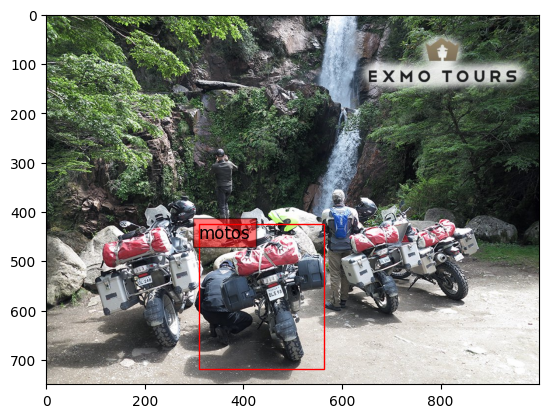

In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

def plot_row(dataset_row, folder_name):
  """
    Visualizer to confirm the data is represented correctly from the CSV
  """
  # Open the image
  image = imageio.imread(f'{folder_name}/{dataset_row["filename"]}')
  fig, ax = plt.subplots()

  width = dataset_row['width']
  height = dataset_row['height']
  class_name = dataset_row['class']

  bounding_box_width = dataset_row["xmax"] - dataset_row["xmin"]
  bounding_box_height = dataset_row["ymax"] - dataset_row["ymin"]
  rectangle = patches.Rectangle(
      (dataset_row["xmin"], dataset_row["ymin"]),
      bounding_box_width,
      bounding_box_height,
      linewidth=1,
      edgecolor='r',
      facecolor='none',
  )
  ax.add_patch(rectangle)

  # Add text inside the rectangle
  ax.text(
      dataset_row["xmin"],
      dataset_row["ymin"],
      class_name,
      fontsize=12,
      verticalalignment='top',
      bbox=dict(facecolor='red', alpha=0.5)
  )

  plt.imshow(image)

plot_row(ml_df.iloc[12], './dataset')

In [ ]:
ml_df.iloc[0]

filename    images/bbe130e8-2b37a718bc.jpg
width                                 1024
height                                 768
class                               carros
xmin                            442.791724
ymin                            351.691034
xmax                            950.201379
ymax                            650.416552
Name: 0, dtype: object

In [ ]:
ml_df.iloc[0][["xmin", "ymin", "xmax", "ymax"]].to_numpy()

array([442.7917241379311, 351.6910344827586, 950.2013793103448,
       650.4165517241379], dtype=object)

# Transformar CSV a TFRecord

In [ ]:
import os
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
%cd /content/models/
!git checkout 58d19c67e1d30d905dd5c6e5092348658fed80af
!apt-get update && apt-get install -y -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
!python object_detection/builders/model_builder_test.py

/content
/content/models
Note: switching to '58d19c67e1d30d905dd5c6e5092348658fed80af'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 58d19c67e Internal change
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-upd

Usando guia de:

https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/tensorflow-1.14/training.html#converting-from-csv-to-record

In [ ]:
import tensorflow as tf
import json
import numpy as np

tf.__version__

'2.15.0'

In [ ]:
"""
Usage:

# Create train data:
python generate_tfrecord.py --label=<LABEL> --csv_input=<PATH_TO_ANNOTATIONS_FOLDER>/train_labels.csv  --output_path=<PATH_TO_ANNOTATIONS_FOLDER>/train.record

# Create test data:
python generate_tfrecord.py --label=<LABEL> --csv_input=<PATH_TO_ANNOTATIONS_FOLDER>/test_labels.csv  --output_path=<PATH_TO_ANNOTATIONS_FOLDER>/test.record
"""

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf
import sys
sys.path.append("../../models/research")

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict


# Es fundamental remplazar las clases con las mismas clases del proyecto.
# Los nombres deben estar escritos exactamente igual.
# Si existen más clases en tu proyecto agregarias un ELIF.
def class_text_to_int(row_label):
    if row_label == 'carros':
        return 1
    elif row_label == 'motos':
        return 2
    else:
        None

def split(df, group):
    """ Create a namedtuple with the filename and all data related to cars
    and/or motorcycles found on the picture"""
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)  # group DataFrame by filename
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]




def create_tf_example(group, path):
    """ Create TFRecord files"""
    image  = tf.keras.utils.load_img(os.path.join(path,'{}'.format(group.filename)))
    width, height = image.size
    image_format = image.format.encode('utf8')
    image = tf.io.encode_jpeg(tf.keras.utils.img_to_array(image))

    filename = group.filename.encode('utf8')

    # check if the image format is matching with your images.
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(image.numpy()),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example




In [ ]:
def turn_csv_to_record(output_path, image_dir, csv_input):
  # Modificamos con la ubicación de nuestros archivos. Recuerda tomarte el tiempo
  # de revisar que la URL sea la misma que la de Google Colab en donde subiste el
  # archivo de forma manual


  writer = tf.io.TFRecordWriter(output_path)
  path = os.path.join(image_dir)
  examples = pd.read_csv(csv_input)
  grouped = split(examples, 'filename')
  for group in grouped:
      tf_example = create_tf_example(group, path)
      writer.write(tf_example.SerializeToString())

  writer.close()
  output_path = os.path.join(os.getcwd(), output_path)
  print('Successfully created the TFRecords: {}'.format(output_path))

In [ ]:

output_path = "/content/dataset_train.record"
image_dir = "/content/dataset/train"
csv_input = "/content/coco_train.csv"

turn_csv_to_record(output_path,image_dir,csv_input)

Successfully created the TFRecords: /content/dataset_train.record


In [ ]:

output_path = "/content/dataset_test.record"
image_dir = "/content/dataset/test"
csv_input = "/content/coco_test.csv"

turn_csv_to_record(output_path,image_dir,csv_input)

Successfully created the TFRecords: /content/dataset_test.record


# Spliting TF Record into training and test